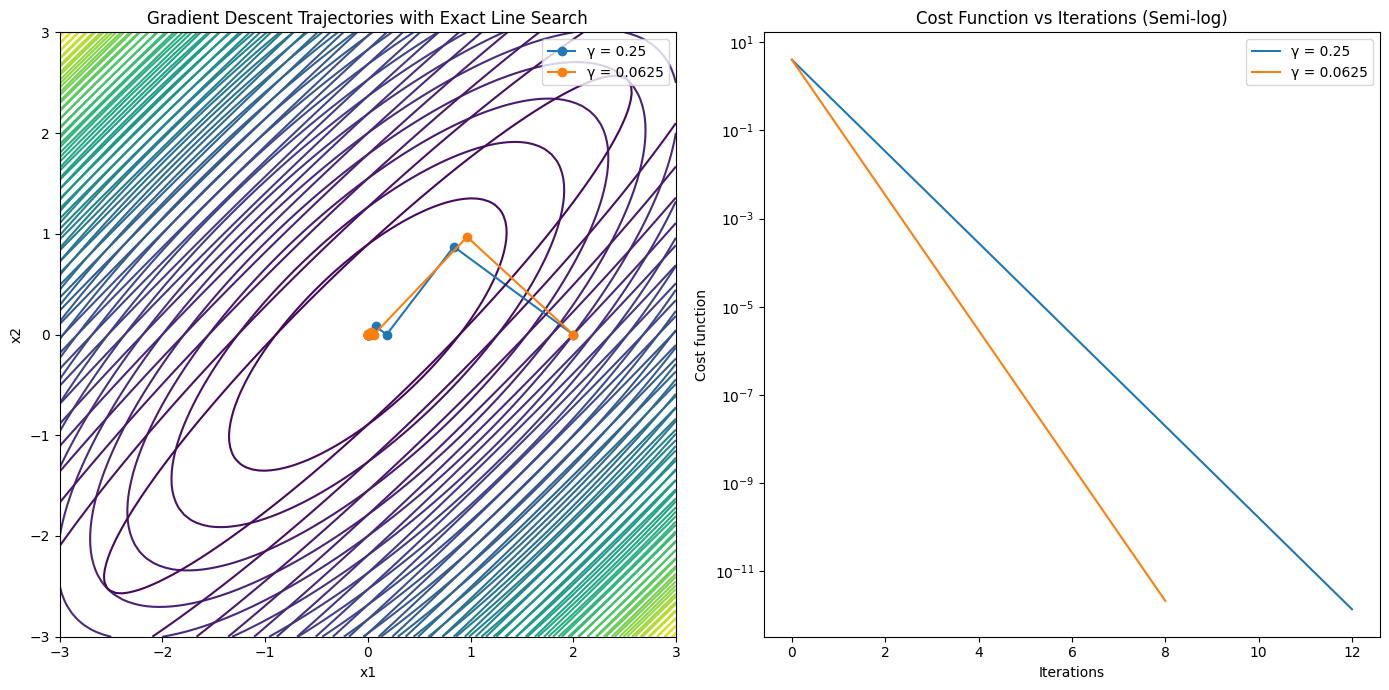

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Exact line search
def exact_line_search(A, grad):
    numerator = grad.T @ grad
    denominator = 2 * grad.T @ A @ grad
    return numerator / denominator

# Gradient Descent with Exact Line Search
def gradient_descent_exact(A, x0, tol=1e-5, max_iter=1000):
    x = x0.astype(float)
    cost_history = [cost_function(x, A)]
    x_history = [x.copy()]
    
    for i in range(max_iter):
        grad = gradient(x, A)
        step_size = exact_line_search(A, grad)
        x -= step_size * grad
        cost_history.append(cost_function(x, A))
        x_history.append(x.copy())
        
        if np.linalg.norm(grad) < tol:
            break
    
    return np.array(x_history), np.array(cost_history), i + 1

# Define parameters
theta = np.pi / 4
x0 = np.array([2, 0], dtype=float)

# Construct A matrix for different gamma values
gamma_values = [1/4, 1/16]
step_sizes = []

# Plot contours of the cost function
x1_vals = np.linspace(-3, 3, 100)
x2_vals = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

plt.figure(figsize=(14, 7))

for idx, gamma in enumerate(gamma_values):
    L = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    D = np.array([[gamma, 0], [0, 2 - gamma]])
    A = L @ D @ np.linalg.inv(L)

    Z = np.array([cost_function(np.array([x1, x2]), A) for x1, x2 in zip(X1.flatten(), X2.flatten())]).reshape(X1.shape)
    
    # Run gradient descent with exact line search
    x_history, cost_history, num_iters = gradient_descent_exact(A, x0)
    
    # Plot trajectory on contour plot
    plt.subplot(1, 2, 1)
    plt.contour(X1, X2, Z, levels=50, cmap='viridis')
    plt.plot(x_history[:, 0], x_history[:, 1], marker='o', label=f'γ = {gamma}')
    
    # Plot cost function vs iterations on a semi-logarithmic scale
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(num_iters + 1), cost_history, label=f'γ = {gamma}')
    plt.yscale('log')

# Plot settings
plt.subplot(1, 2, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Trajectories with Exact Line Search')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Cost Function vs Iterations (Semi-log)')
plt.legend()

plt.tight_layout()
plt.show()
